In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install fasttext
import fasttext

In [3]:
# Read the data
#from google.colab import drive
#drive.mount('/content/drive')
data = pd.read_csv('book_data.csv')
# Only keep columns we need
data.head()     

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [4]:
# Check column names
data.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres', 'image_url'],
      dtype='object')

---
### Filter Columns

In [5]:
# Only keep columns we need
# eda_data = data[['Id', 'Name', 'Authors', 'ISBN', 'PublishYear', 'Publisher', 'Language', 'Description']].copy()
eda_data = data[['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn', 'book_pages', 'book_rating', 'book_rating_count', 'book_title', 'genres', 'image_url']].copy()
eda_data.head()     

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [6]:
# Find number of smaples and features
eda_data.shape

(54301, 11)

In [7]:
# Check data types of features
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54301 entries, 0 to 54300
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       54301 non-null  object 
 1   book_desc          52970 non-null  object 
 2   book_edition       5453 non-null   object 
 3   book_format        52645 non-null  object 
 4   book_isbn          41435 non-null  object 
 5   book_pages         51779 non-null  object 
 6   book_rating        54301 non-null  float64
 7   book_rating_count  54301 non-null  int64  
 8   book_title         54301 non-null  object 
 9   genres             51059 non-null  object 
 10  image_url          53618 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


---
# Data Cleaning

### Find missing values and replace with appropriate substitution.

In [8]:
# Find number of NaN in each column
eda_data.isna().sum()

book_authors             0
book_desc             1331
book_edition         48848
book_format           1656
book_isbn            12866
book_pages            2522
book_rating              0
book_rating_count        0
book_title               0
genres                3242
image_url              683
dtype: int64

In [9]:
# eda_data.Language.unique()
# Ko co language

---
### Replace missing publisher info with unknown

In [10]:
# eda_data[["Publisher"]] = eda_data[["Publisher"]].fillna("unknown")
# Ko co Publisher

In [11]:
eda_data.isna().sum()

book_authors             0
book_desc             1331
book_edition         48848
book_format           1656
book_isbn            12866
book_pages            2522
book_rating              0
book_rating_count        0
book_title               0
genres                3242
image_url              683
dtype: int64

---
### Remove rows with missing description

In [12]:
# Remove rows having atleast ine NaN in any feature
# eda_data.dropna(axis=0, how="any", inplace=True)
eda_data.dropna(subset=["book_desc"], inplace=True)

---
### Remove URLs from the description

In [13]:
# list(eda_data.book_desc[eda_data.Id == 1099555]) #Description with url and html tag

# ko co Id

In [14]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_url(text):   
    return re.sub(url_pattern, r'', text)

eda_data.book_desc = eda_data.book_desc.apply(remove_url)

---
### Remove html tags from the description.

In [15]:
html_pattern = re.compile('<[^>]*>')
def clean_html_tags(text):
    return re.sub(html_pattern, r'', text)

eda_data.book_desc = eda_data.book_desc.apply(clean_html_tags)

eda_data.book_desc

0        Winning will make you famous. Losing means cer...
1        There is a door at the end of a silent corrido...
2        The unforgettable novel of a childhood in a sl...
3        «È cosa ormai risaputa che a uno scapolo in po...
4        About three things I was absolutely positive.F...
                               ...                        
54295    Avi Steinberg is stumped. After defecting from...
54296    In this fearless and half-crazy story, Howard ...
54297    From the icons of the game to the players who ...
54299    Soon to be a major motion picture, from Brad P...
54300    The Anthology and the Rise of the Novel brings...
Name: book_desc, Length: 52970, dtype: object

In [16]:
# list(eda_data.Description[eda_data.Id == 1099555])

# ko co id

---
### Remove punctuations from the description

In [17]:
## Remove punctuation and special characters/symbols
def rm_punc(text):
    return re.sub(r'\W+|_', ' ', text)
eda_data.book_desc = eda_data.book_desc.apply(rm_punc)

In [18]:
eda_data.book_desc.head(5)

0    Winning will make you famous Losing means cert...
1    There is a door at the end of a silent corrido...
2    The unforgettable novel of a childhood in a sl...
3     È cosa ormai risaputa che a uno scapolo in po...
4    About three things I was absolutely positive F...
Name: book_desc, dtype: object

In [19]:
# copy the initial states for website display in the future
eda_data["book_authors_init"] = eda_data["book_authors"]
eda_data["book_title_init"] = eda_data["book_title"]

---
### Remove extra spaces from the text columns and convert the lettercase to lower

In [20]:
eda_data[["book_title", "book_authors", "book_desc"]] = pd.concat([eda_data[col].astype(str).str.lower().str.strip() for col in ["book_title", "book_authors", "book_desc"]], axis=1)
eda_data.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init
0,suzanne collins,winning will make you famous losing means cert...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,the hunger games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Suzanne Collins,The Hunger Games
1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,J.K. Rowling|Mary GrandPré,Harry Potter and the Order of the Phoenix
2,harper lee,the unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,to kill a mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Harper Lee,To Kill a Mockingbird
3,jane austen|anna quindlen|mrs. oliphant|george...,è cosa ormai risaputa che a uno scapolo in pos...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,pride and prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,Pride and Prejudice
4,stephenie meyer,about three things i was absolutely positive f...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Stephenie Meyer,Twilight


---
### Find book descriptions with very short length and remove them.

In [21]:
# Remove books with very short desc
eda_data["length"] = [len(d.split()) for d in eda_data['book_desc'].tolist()]
eda_data[eda_data.length.isin(range(0,4))][["book_title", "book_desc", "length"]]\
.sort_values(by=["length"], ascending=True).head(10)

,book_title,book_desc,length
44796,eight's origin,,0
19336,οδύσσεια,,0
25640,alkestis,,0
17964,issuance of insanity,,0
26722,titus et bouboule en egypte,,0
48470,helena,,0
21269,feep's commentaries,kindle,1
22101,دوره آثار افلاطون چهار جلدی,دوره4جلدی,1
22913,the mustard seed: the gnostic teachings of jes...,update,1
22917,the decision is yours,religious,1


- As we have removed tags we see empty strings in the description, lets first convert them to NaN and then remove them

In [22]:
# Replace empty strings of description with NaN
eda_data.book_desc = eda_data.book_desc.replace(r'^\s*$', np.nan, regex=True)

eda_data[eda_data.length.isin(range(0,4))][["book_title", "book_desc", "length"]]\
.sort_values(by=["length"], ascending=True).head()

,book_title,book_desc,length
44796,eight's origin,NaN,0
19336,οδύσσεια,NaN,0
25640,alkestis,NaN,0
17964,issuance of insanity,NaN,0
26722,titus et bouboule en egypte,NaN,0


In [23]:
eda_data.dropna(subset=["book_desc"], inplace=True)

eda_data[eda_data.length.isin(range(0,4))][["book_title", "book_desc", "length"]]\
.sort_values(by=["length"], ascending=True).head()

,book_title,book_desc,length
36245,منخفض الهند الموسمي,رواية,1
19936,diary of a wimpy kid: #1-5 [box set],name,1
19985,ضربة شمس,مقالات,1
45697,valkyrie: the vampire princess 2,sinopsis,1
20265,وبدأ العد التنازلي,للتحميل,1


In [24]:
print(set(eda_data.book_desc[eda_data.length.isin(range(0,4))]))

{'hardcover book', 'second edition', 'رابط التحميل', 'in the dark', 'biblioteca contemporanea', 'blogs journal book', 'west östlicher divan', 'georgously green', 'sleeping arrangements', 'book by', '7 مجلدات', 'rare book', 'شعر', 'the divide', 'divine justice', 'ألبوم أجتماعى ساخر', '14 مجلد', 'science fiction', 'paranormal romance', 'baryshnya krestyanka', 'religious', 'dora little hans', 'indecent exposure', 'ποιητική συλλογή', 'corambis', 'مقالات', 'أشعار بالعامية المصرية', 'the fourth protocol', 'شعر عامية', 'translation', 'paper towns', 'سفر نامه', 'مجموعه شعر رباعی', 'showtime', 'new', 'elvenblood halfblood chronicles', 'true story', 'fiction', 'i am ozzy', 'beachcombers a novel', 'the prince', 'تطوير الذات', 'a love story', 'update', 'gestalt therapy', '442pages poche broché', 'νεοελληνική ποίηση', 'historical fiction', 'دوره4جلدی', 'name', 'book', 'south beach diet', 'life in dauphiny', 'used acceptable', '0', 'winner', 'hardcoverno jacket', 'historical novel', 'out of print', 

In [25]:
# Drop records with very short description
eda_data.drop(eda_data.index[eda_data.length.isin(range(0,4))], inplace = True)
print(eda_data[eda_data.length.isin(range(0,4))].shape[0])
del eda_data["length"]

0


In [26]:
eda_data.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init
0,suzanne collins,winning will make you famous losing means cert...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,the hunger games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Suzanne Collins,The Hunger Games
1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,J.K. Rowling|Mary GrandPré,Harry Potter and the Order of the Phoenix
2,harper lee,the unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,to kill a mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Harper Lee,To Kill a Mockingbird
3,jane austen|anna quindlen|mrs. oliphant|george...,è cosa ormai risaputa che a uno scapolo in pos...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,pride and prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,Pride and Prejudice
4,stephenie meyer,about three things i was absolutely positive f...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Stephenie Meyer,Twilight


### Detecting languages 

In [27]:
## Detecting languages using FastText pre-trained model
ft_model = fasttext.load_model('temp/lid.176.ftz')

def detector(text):
    if not text:
        return ""
    return ft_model.predict(text, k=1)[0][0].split("__label__")[1]
eda_data["language"] = eda_data["book_desc"].apply(detector)

In [28]:
#display(eda_data)
# shows all remaining languages
eda_data["language"].unique()

array(['en', 'it', 'ar', 'es', 'fa', 'de', 'pl', 'nl', 'ru', 'fr', 'id',
       'pt', 'bg', 'ja', 'tr', 'hr', 'hu', 'no', 'sv', 'fi', 'ro', 'el',
       'cs', 'sr', 'da', 'tl', 'et', 'vi', 'sk', 'ka', 'hi', 'ne', 'sl',
       'ur', 'bn', 'ms', 'sh', 'lt', 'ca', 'eu', 'mk', 'ta', 'ml', 'zh',
       'arz', 'uz', 'mn', 'ko', 'lv', 'am', 'mr', 'uk', 'is', 'sq', 'hy',
       'gl', 'kw', 'ceb', 'nn'], dtype=object)

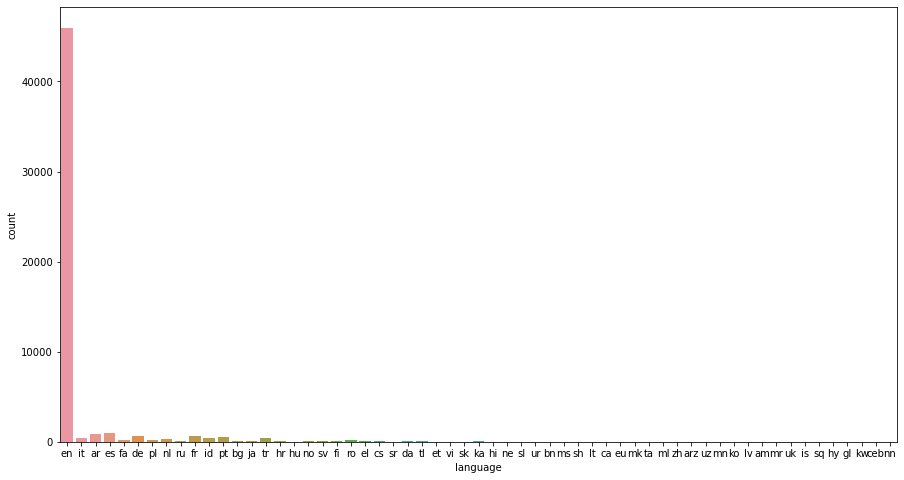

In [29]:
# Some data analysis here
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.countplot(x="language",data=eda_data)

In [30]:
# we have 45,977 English books
eda_data.loc[eda_data['language'] == 'en']

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init,language
0,suzanne collins,winning will make you famous losing means cert...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,the hunger games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Suzanne Collins,The Hunger Games,en
1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,J.K. Rowling|Mary GrandPré,Harry Potter and the Order of the Phoenix,en
2,harper lee,the unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,to kill a mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Harper Lee,To Kill a Mockingbird,en
4,stephenie meyer,about three things i was absolutely positive f...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Stephenie Meyer,Twilight,en
5,markus zusak,trying to make sense of the horrors of world w...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,the book thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,Markus Zusak,The Book Thief,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,avi steinberg,avi steinberg is stumped after defecting from ...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,running the books: the adventures of an accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,Avi Steinberg,Running the Books: The Adventures of an Accide...,en
54296,howard megdal,in this fearless and half crazy story howard m...,NaN,Hardcover,9.78161E+12,256 pages,3.37,27,taking the field: a fan's quest to run the tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,Howard Megdal,Taking the Field: A Fan's Quest to Run the Tea...,en
54297,howard megdal,from the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,"the baseball talmud: koufax, greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,Howard Megdal,"The Baseball Talmud: Koufax, Greenberg, and th...",en
54299,mimi baird|eve claxton,soon to be a major motion picture from brad pi...,NaN,Hardcover,9.7808E+12,272 pages,3.82,867,he wanted the moon: the madness and medical ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...,Mimi Baird|Eve Claxton,He Wanted the Moon: The Madness and Medical Ge...,en


In [31]:
## Remove all except eng books
eda_data = eda_data.query("language == 'en'")
eda_data = eda_data.drop("language", axis=1)

In [32]:
eda_data.shape

(45977, 13)

---
### Find if there is duplication of rows/features

In [33]:
# Find number of duplicated rows
eda_data[eda_data.duplicated()==True].shape[0]

0

In [34]:
# Remove all but the first occurence
eda_data = eda_data.drop_duplicates()

eda_data[eda_data.duplicated()==True].shape[0]

0

In [35]:
# Find number of duplicated values of each feature
eda_data.shape[0] - eda_data.nunique()

book_authors         23732
book_desc             1258
book_edition         44606
book_format          45869
book_isbn            45575
book_pages           44659
book_rating          45727
book_rating_count    25934
book_title            5535
genres               18801
image_url              371
book_authors_init    23732
book_title_init       5371
dtype: int64

---
### Drop variants of the same book
- We see that some descriptions are repeated this possibly could be due to different versions of the same book. ISBN has missing values. Repeated values in Authors, Publisher can help in book recommedation. 
- We see that same books have different ISBN because an ISBN is assigned to each separate edition and variation of a publication. ISBN is like an identity number for each edition, imprint, impression or version of the same book. For example, an e-book, a paperback and a hardcover edition of the same book will each have a different ISBN (except reprintings).
- Only keep the first occurrence and delete rest.

In [36]:
# Convert unknown to NaN
# eda_data["Publisher"] = eda_data.Publisher.replace('unknown',np.nan)

# Find books that have same Name, Author, Description and Publisher
eda_data[eda_data.duplicated(subset=["book_title", "book_authors", "book_desc"])][["book_isbn", "book_title", "book_authors", "book_desc"]].head(10)

,book_isbn,book_title,book_authors,book_desc
1207,9.78141E+12,red queen,victoria aveyard,this is a world divided by blood red or silver...
1940,9.78014E+12,the grapes of wrath,john steinbeck,the pulitzer prize winning epic of the great d...
2039,9.78055E+12,gone girl,gillian flynn,on a warm summer morning in north carthage mis...
2088,9.7814E+12,memoirs of a geisha,arthur golden,a literary sensation and runaway bestseller th...
2248,9.78155E+12,for the love of armin,michael kramer,in september of the year 9 a d the young germa...
2435,9.78159E+12,hollow city,ransom riggs,this second novel begins in 1940 immediately a...
2459,9.7816E+12,thirteen reasons why,jay asher,you can t stop the future you can t rewind the...
2759,NaN,american gods,neil gaiman,days before his release from prison shadow s w...
3018,9.78045E+12,it,stephen king,welcome to derry maine it s a small city a pla...
3355,9.7816E+12,vampire academy,richelle mead,only a true best friend can protect you from y...


In [37]:
# All books with the title Red Queen
eda_data[eda_data["book_title_init"]=="Red Queen"]

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init
830,victoria aveyard,this is a world divided by blood red or silver...,NaN,Hardcover,9.78006E+12,383 pages,4.07,400348,red queen,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1449778912l...,Victoria Aveyard,Red Queen
1207,victoria aveyard,this is a world divided by blood red or silver...,NaN,Hardcover,9.78141E+12,383 pages,4.07,400358,red queen,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1411472322l...,Victoria Aveyard,Red Queen
4518,victoria aveyard,this is a world divided by blood red or silver...,NaN,Paperback,9.78141E+12,388 pages,4.07,400676,red queen,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1414165153l...,Victoria Aveyard,Red Queen
21736,victoria aveyard,this is a world divided by blood red or silver...,NaN,Paperback,9.78141E+12,383 pages,4.07,400980,red queen,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1425865144l...,Victoria Aveyard,Red Queen
27697,victoria aveyard|amanda dolan,mare barrow s world is divided by blood those ...,NaN,Audiobook,9.78006E+12,13 pages,4.07,401001,red queen,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1420791169l...,Victoria Aveyard|Amanda Dolan,Red Queen
47773,christina henry,the author of alice takes readers back down th...,NaN,Paperback,9.78043E+12,291 pages,3.81,4291,red queen,Fantasy|Horror|Retellings|Fiction,https://images.gr-assets.com/books/1453056797l...,Christina Henry,Red Queen


In [38]:
## Remove duplicates, keep the first occurence
eda_data = eda_data.drop_duplicates(subset=["book_title", "book_authors"], keep='first')
## Any remainders (same book title, different authors), put number at the end to use as index later
eda_data['book_title'] = np.where(eda_data['book_title'].duplicated(keep=False), 
                      eda_data['book_title'] + eda_data.groupby('book_title').cumcount().add(1).astype(str),
                      eda_data['book_title'])
eda_data.shape

(43292, 13)

In [39]:
eda_data[eda_data["book_title_init"]=="Red Queen"]

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init
830,victoria aveyard,this is a world divided by blood red or silver...,NaN,Hardcover,9.78006E+12,383 pages,4.07,400348,red queen1,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1449778912l...,Victoria Aveyard,Red Queen
27697,victoria aveyard|amanda dolan,mare barrow s world is divided by blood those ...,NaN,Audiobook,9.78006E+12,13 pages,4.07,401001,red queen2,Fantasy|Young Adult|Science Fiction|Dystopia|R...,https://images.gr-assets.com/books/1420791169l...,Victoria Aveyard|Amanda Dolan,Red Queen
47773,christina henry,the author of alice takes readers back down th...,NaN,Paperback,9.78043E+12,291 pages,3.81,4291,red queen3,Fantasy|Horror|Retellings|Fiction,https://images.gr-assets.com/books/1453056797l...,Christina Henry,Red Queen


- Though we have deleted rows with same name, authors and description, when we find books having duplicated description we observe certain records, this happens due to minor textual changes in the Name of the book and also because certain descriptions are repetitive for different books.

In [40]:
eda_data[eda_data.duplicated(subset=["book_desc"], keep="first")][["book_isbn", "book_title", "book_authors", "book_desc"]]

,book_isbn,book_title,book_authors,book_desc
132,9.78035E+12,anna karenina2,leo tolstoy|aylmer maude|louise maude,acclaimed by many as the world s greatest nove...
6192,9.78043E+12,prince's gambit,c.s. pacat,with their countries on the brink of war damen...
6383,9.78163E+12,crooked kingdom2,leigh bardugo,when you can t beat the odds change the game k...
6544,9.78076E+12,a monster calls2,patrick ness|siobhan dowd|jim kay,an unflinching darkly funny and deeply moving ...
7189,9.78141E+12,prague counterpoint,bodie thoene|brock thoene,opening in 1936 the zion covenant series tells...
...,...,...,...,...
54030,NaN,lady susan2,jane austen,beautiful flirtatious and recently widowed lad...
54063,9.78186E+12,a country doctor's notebook,mikhail bulgakov|михаил булгаков,brilliant stories that show the growth of a no...
54132,9.78032E+12,the melancholy of suzumiya haruhi-chan: the un...,nagaru tanigawa|puyo,say haruhiiiiiii as if he doesn t have enough ...
54148,NaN,the long weekend3,ross lennon,five people working for the same company but n...


---
### Extract book series information from the name of the book
- Remove irrelevant info from the name of the book to improve efficiency of the tokenization.
- Book names with hashtag represent edition of the book in a series

In [41]:
# series_pattern =  "(?:[;]\s*|\(\s*)([^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*))"
# def get_book_series_info(text):
#     series_info = re.findall(series_pattern, text)
#     if series_info:
#         series_info = " ".join([i.replace(" ", "_") for i in series_info])
#         return series_info
#     else:
#         return np.nan
    

# eda_data['BookSeriesInfo'] = eda_data.Name.apply(get_book_series_info)

# book_name_cases = ["Sire Lines, Revised Edition (Blood-Horse Classics Library)", 
#                    "Lovers and Ladies (Lovers and Ladies, #5&6)",
#                    "Oh, Cuan Lejos Llegaras! (Oh, the Places You'll Go!", "Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)", 
#                    "Fairy Realm edition, #1-3 (Fairy Realm, #1-3)", "Fairy Realm edition, #1.3 (Fairy Realm, #1.3)", 
#                    "Codes: How to Make Them and Break Them (Murderous Maths, # 14)",
#                    "The Best Catch In Texas (Men of the West, #10) (Silhouette Special Edition #1814)",
#                    "Patriot Games ((Blood-Horse Classics Library)) (Jack Ryan, #1; Jack Ryan Universe, #2)"]

# print("\033[1m{:90}\033[0m\033[1m{:5}\033[0m".format("Book Name", "Series Information"))
# for name in book_name_cases:
#     print("{!s:90}{!s:5}".format(name, get_book_series_info(name)))


- As we are using regex there will be certain exceptions, for example it misses a book name with nested brackets case. The name of the book is "Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)", it should extract series information as `Ranma ½ (US 2nd), #28]`, instead, it extracts `[US 2nd), #28]`

In [42]:
# eda_data[["Id","Name", "BookSeriesInfo"]][eda_data.BookSeriesInfo.isna() == False]

In [43]:
# eda_data.isna().sum()

---
### Remove the series info from the name of the book

In [44]:
# series_remove_pattern = re.compile("(?:[\(]\s*[^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*)(?:;|\))|\s*[^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*)\))")       
# def remove_series_info(text):
#     return re.sub(series_remove_pattern, r'', text)

# print("\033[1m{:80}\033[0m\033[1m{:5}\033[0m".format("Book Name", "Series Information"))
# for name in book_name_cases:
#     print("{!s:80}{!s:5}".format(name, remove_series_info(name)))

# eda_data["Title"]= eda_data["book_title"].str.replace(series_remove_pattern, r'').str.strip()

---
### Impute missing language with book title language

In [45]:
# from nltk.classify.textcat import TextCat
# tc = TextCat()

# def detect_language(text):
#     text = " ".join(text.split()[:5])
#     if text.isnumeric():
#         return 'eng'
#     else:
#         return tc.guess_language(text).strip()

In [46]:
# import dask.dataframe as dd
# import multiprocessing
# ddf = dd.from_pandas(eda_data, npartitions=4*multiprocessing.cpu_count()) 
# eda_data["Language"] = ddf.map_partitions(lambda df: df.apply(lambda x: detect_language(x['Name']) if pd.isna(x['Language']) else x['Language'], axis=1)).compute() 

In [47]:
eda_data.isna().sum()

book_authors             0
book_desc                0
book_edition         39527
book_format            779
book_isbn             8042
book_pages            1828
book_rating              0
book_rating_count        0
book_title               0
genres                2178
image_url              349
book_authors_init        0
book_title_init          0
dtype: int64

---
### Remove quotes from Publisher column 

In [48]:
# eda_data["Publisher"] = eda_data["Publisher"].str.replace('"','')

---
### Transform book and author names into single token
- Merge first and last name of authors so that two authors with same first or last name are not considered same when the tokenization happens.
- Also merge name of the book so that it is considered as single token during the processing.

In [49]:
eda_data["book_authors"] = eda_data["book_authors"].str.strip().str.replace(' ','_')

## separate co-author names so they are 2 separate keywords
eda_data["book_authors"] = eda_data["book_authors"].str.strip().str.replace('|',' ', regex=False)

eda_data["book_title"] = eda_data["book_title"].str.strip().str.replace(' ','_')
eda_data.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init
0,suzanne_collins,winning will make you famous losing means cert...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,the_hunger_games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Suzanne Collins,The Hunger Games
1,j.k._rowling mary_grandpré,there is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,harry_potter_and_the_order_of_the_phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,J.K. Rowling|Mary GrandPré,Harry Potter and the Order of the Phoenix
2,harper_lee,the unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,to_kill_a_mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Harper Lee,To Kill a Mockingbird
4,stephenie_meyer,about three things i was absolutely positive f...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,twilight1,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Stephenie Meyer,Twilight
5,markus_zusak,trying to make sense of the horrors of world w...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,the_book_thief1,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,Markus Zusak,The Book Thief


---
### Merge all textual information to create summary
- Combine all book authors with other related book info (genre, difficulty) [in progress, may change in the future]
- This will then combine with books' keywords in the future

In [50]:
eda_data["bow"] = eda_data[['book_authors']].fillna('').agg(' '.join, axis=1)
eda_data.drop(["book_isbn"], axis = 1, inplace=True)

In [51]:
eda_data.bow.iloc[8375]

'andrew_lang henry_justice_ford george_percy_jacomb-hood leonora_blanche_alleyne_lang'

In [52]:
eda_data

,book_authors,book_desc,book_edition,book_format,book_pages,book_rating,book_rating_count,book_title,genres,image_url,book_authors_init,book_title_init,bow
0,suzanne_collins,winning will make you famous losing means cert...,NaN,Hardcover,374 pages,4.33,5519135,the_hunger_games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Suzanne Collins,The Hunger Games,suzanne_collins
1,j.k._rowling mary_grandpré,there is a door at the end of a silent corrido...,US Edition,Paperback,870 pages,4.48,2041594,harry_potter_and_the_order_of_the_phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,J.K. Rowling|Mary GrandPré,Harry Potter and the Order of the Phoenix,j.k._rowling mary_grandpré
2,harper_lee,the unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,324 pages,4.27,3745197,to_kill_a_mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Harper Lee,To Kill a Mockingbird,harper_lee
4,stephenie_meyer,about three things i was absolutely positive f...,NaN,Paperback,498 pages,3.58,4281268,twilight1,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Stephenie Meyer,Twilight,stephenie_meyer
5,markus_zusak,trying to make sense of the horrors of world w...,First American Edition (US / CAN),Hardcover,552 pages,4.36,1485632,the_book_thief1,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,Markus Zusak,The Book Thief,markus_zusak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,avi_steinberg,avi steinberg is stumped after defecting from ...,NaN,Hardcover,399 pages,3.51,3717,running_the_books:_the_adventures_of_an_accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,Avi Steinberg,Running the Books: The Adventures of an Accide...,avi_steinberg
54296,howard_megdal,in this fearless and half crazy story howard m...,NaN,Hardcover,256 pages,3.37,27,taking_the_field:_a_fan's_quest_to_run_the_tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,Howard Megdal,Taking the Field: A Fan's Quest to Run the Tea...,howard_megdal
54297,howard_megdal,from the icons of the game to the players who ...,NaN,Hardcover,256 pages,3.97,34,"the_baseball_talmud:_koufax,_greenberg,_and_th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,Howard Megdal,"The Baseball Talmud: Koufax, Greenberg, and th...",howard_megdal
54299,mimi_baird eve_claxton,soon to be a major motion picture from brad pi...,NaN,Hardcover,272 pages,3.82,867,he_wanted_the_moon:_the_madness_and_medical_ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...,Mimi Baird|Eve Claxton,He Wanted the Moon: The Madness and Medical Ge...,mimi_baird eve_claxton


---
### Save Preprocessed Data

In [53]:
eda_data.to_csv("preprocessed_april25th.csv", sep=",", index=False)